# DSCI Capstone Project

By Nate Herman

# Overview

## Background

* The NBA is composed of 450 players each season
* Each season there are close to 200,000 shots taken across the league
* Around 45% of shots taken are made in a typical season coming out to around 90,000 makes out of the 200,000 attempts
* There are many categories to be rumored to affect how well players shoot whether it’s minutes, shot attempts, or even free throw percentage

## Data

I am going to use the player statistics from the 2014-15 NBA season. This season was before the true breakout of Steph Curry, which led to a massive increase of 3-point attempts across the league. This dataset will be skewed less by shot distance than the current 3-point heavy era we are currently seeing in the NBA. Shots were more evenly distributed between 3s, mid-range, and inside shots. https://www.kaggle.com/drgilermo/nba-players-stats-20142015?select=players_stats.csv 

## Objective

I plan to figure out which variables are the most closely correlated with points scored. I plan on exploring the dataset and finding out what variables most clearly increase or decrease a player’s scoring ability. Then I will create a model to predict points scored based off of a value from the most closely correlated variable

# Data Prep

## Setup/Imports

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Needed Imports
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.model_selection import train_test_split

# to make this notebook's output stable across runs
np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Loading in the Data

In [2]:
stats = pd.read_csv("players_stats.csv")

## Looking at Data Structure

In [4]:
stats.head()

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
0,AJ Price,26,324,133,51,137,37.2,15,57,26.3,...,29.0,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.798393
1,Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,...,30.0,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.361111
2,Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,...,20.0,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.142661
3,Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,...,24.0,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.377751
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,...,29.0,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.234384


In [4]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          490 non-null    object 
 1   Games Played  490 non-null    int64  
 2   MIN           490 non-null    int64  
 3   PTS           490 non-null    int64  
 4   FGM           490 non-null    int64  
 5   FGA           490 non-null    int64  
 6   FG%           490 non-null    float64
 7   3PM           490 non-null    int64  
 8   3PA           490 non-null    int64  
 9   3P%           490 non-null    float64
 10  FTM           490 non-null    int64  
 11  FTA           490 non-null    int64  
 12  FT%           490 non-null    float64
 13  OREB          490 non-null    int64  
 14  DREB          490 non-null    int64  
 15  REB           490 non-null    int64  
 16  AST           490 non-null    int64  
 17  STL           490 non-null    int64  
 18  BLK           490 non-null    

In [5]:
stats.describe()

,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,BLK,TOV,PF,EFF,AST/TOV,STL/TOV,Age,Height,Weight,BMI
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000,490.000000,...,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,422.000000,422.000000,422.000000,422.000000
mean,53.014286,1214.714286,502.108163,188.338776,419.526531,43.099184,39.387755,112.52449,25.519184,86.042857,...,24.075510,68.826531,101.483673,564.330612,1.465837,0.626000,27.507109,197.440758,99.469194,25.427747
std,24.175437,820.570132,422.084232,156.265752,337.367125,9.625231,47.880909,127.38575,15.796603,91.315316,...,31.662852,58.480701,65.326807,464.428031,0.825037,0.367443,4.220603,8.740250,12.364228,1.715794
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000,20.000000,172.500000,72.450000,20.411523
25%,33.000000,492.250000,145.250000,55.500000,139.000000,39.600000,1.000000,6.00000,15.500000,18.500000,...,5.000000,23.000000,45.500000,165.000000,0.920000,0.392500,24.000000,190.000000,90.000000,24.286136
50%,61.000000,1193.000000,423.000000,156.000000,357.500000,42.900000,18.000000,58.00000,31.300000,58.000000,...,14.000000,56.500000,103.000000,490.500000,1.345000,0.530000,27.000000,197.500000,99.000000,25.420833
75%,74.000000,1905.750000,774.000000,286.000000,642.750000,47.575000,66.000000,192.00000,36.400000,126.750000,...,29.750000,100.000000,148.750000,837.000000,1.920000,0.820000,30.000000,205.000000,108.000000,26.437500
max,83.000000,2981.000000,2217.000000,659.000000,1471.000000,100.000000,286.000000,646.00000,100.000000,715.000000,...,200.000000,321.000000,285.000000,2202.000000,6.500000,3.000000,39.000000,222.500000,162.000000,32.723141


Saving figure attribute_histogram_plots


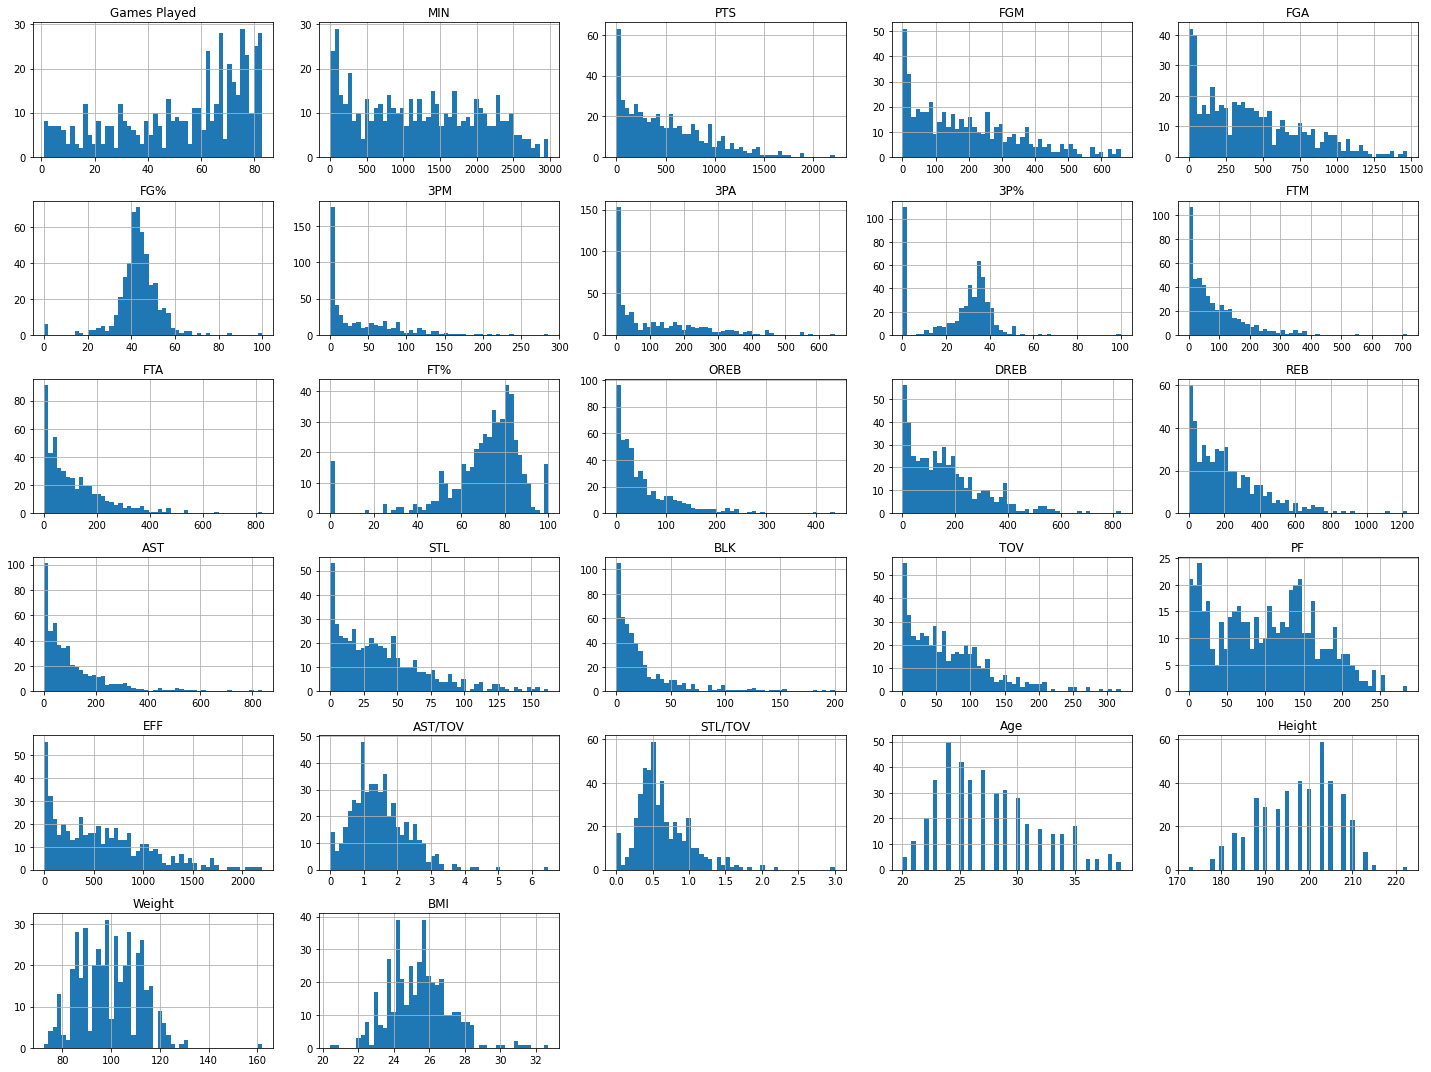

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
stats.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

## Adding interesting variables

In [3]:
stats["PPG"] = stats["PTS"]/stats["Games Played"]
stats["APG"] = stats["AST"]/stats["Games Played"]
stats["RPG"] = stats["REB"]/stats["Games Played"]
stats["MPG"] = stats["MIN"]/stats["Games Played"]

In [8]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          490 non-null    object 
 1   Games Played  490 non-null    int64  
 2   MIN           490 non-null    int64  
 3   PTS           490 non-null    int64  
 4   FGM           490 non-null    int64  
 5   FGA           490 non-null    int64  
 6   FG%           490 non-null    float64
 7   3PM           490 non-null    int64  
 8   3PA           490 non-null    int64  
 9   3P%           490 non-null    float64
 10  FTM           490 non-null    int64  
 11  FTA           490 non-null    int64  
 12  FT%           490 non-null    float64
 13  OREB          490 non-null    int64  
 14  DREB          490 non-null    int64  
 15  REB           490 non-null    int64  
 16  AST           490 non-null    int64  
 17  STL           490 non-null    int64  
 18  BLK           490 non-null    

In [9]:
stats.head()

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,Experience,Height,Pos,Team,Weight,BMI,PPG,APG,RPG,MPG
0,AJ Price,26,324,133,51,137,37.2,15,57,26.3,...,5,185.0,PG,PHO,81.45,23.798393,5.115385,1.769231,1.230769,12.461538
1,Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,...,6,180.0,PG,CHI,72.45,22.361111,11.634146,3.182927,2.024390,22.987805
2,Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,...,R,202.5,PF,ORL,99.00,24.142661,5.170213,0.702128,3.595745,16.957447
3,Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,...,R,205.0,PF,ATL,106.65,25.377751,6.656250,0.937500,5.062500,23.125000
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,...,7,205.0,C,ATL,110.25,26.234384,15.210526,3.210526,7.157895,30.500000


## Finding Most Correllated Variables

In [10]:
corr_matrix1 = stats.corr()
corr_matrix1["FG%"].sort_values(ascending=False)

FG%             1.000000
OREB            0.470353
RPG             0.465806
REB             0.449062
BLK             0.419133
DREB            0.417240
EFF             0.383651
Weight          0.383616
PF              0.375768
Games Played    0.369492
Height          0.366599
FGM             0.310255
MIN             0.304910
FTA             0.286115
PTS             0.275514
PPG             0.264335
MPG             0.253758
FTM             0.235433
FGA             0.231871
TOV             0.226864
FT%             0.220422
BMI             0.216849
STL             0.184414
Age             0.089074
AST             0.084949
APG             0.005932
3PM            -0.045385
STL/TOV        -0.064153
3PA            -0.070072
3P%            -0.097218
AST/TOV        -0.124186
Name: FG%, dtype: float64

Suprisingly, there were bsaically no variables that connected closely to Field Goal % and the closest ones all favored big men, rather than traditionally thought of 'Good Shooters'. I think lack of solid correlation could make it hard to have a very accurate predictive model

In [11]:
corr_matrix = stats.corr()
corr_matrix["PTS"].sort_values(ascending=False)

PTS             1.000000
FGM             0.990487
FGA             0.988716
EFF             0.941961
PPG             0.923116
MIN             0.920196
FTM             0.909402
FTA             0.901151
TOV             0.883540
MPG             0.858726
STL             0.807294
DREB            0.756875
PF              0.753363
AST             0.728515
Games Played    0.727973
REB             0.696554
3PA             0.627413
3PM             0.615766
APG             0.601589
RPG             0.589967
OREB            0.482101
BLK             0.445102
FT%             0.340922
3P%             0.290644
FG%             0.275514
AST/TOV         0.166571
BMI             0.078018
Age             0.063428
Weight          0.030831
Height         -0.016891
STL/TOV        -0.102540
Name: PTS, dtype: float64

In [52]:
corr_matrix = stats.corr()
corr_matrix["PPG"].sort_values(ascending=False)

PPG             1.000000
PTS             0.923116
FGA             0.909870
FGM             0.907817
MPG             0.893229
FTM             0.869126
FTA             0.852757
EFF             0.838566
TOV             0.800243
MIN             0.786010
STL             0.704655
AST             0.658395
DREB            0.644370
APG             0.642987
PF              0.600217
RPG             0.590087
REB             0.586435
3PA             0.564857
3PM             0.554437
Games Played    0.528034
OREB            0.389753
FT%             0.371503
BLK             0.362572
3P%             0.332401
FG%             0.264335
AST/TOV         0.169810
BMI             0.062161
Age             0.045650
Weight         -0.000744
Height         -0.048886
STL/TOV        -0.130770
Name: PPG, dtype: float64

In [12]:
PlayerPoints = stats[['Name','PTS']].groupby('Name').sum().sort_values('PTS', ascending = False).head(20)
PlayerPoints.head()

,PTS
Name,
James Harden,2217
Stephen Curry,1900
Russell Westbrook,1886
LeBron James,1743
Damian Lillard,1720


In [13]:
PlayerMins = stats[['Name','MIN']].groupby('Name').sum().sort_values('MIN', ascending = False).head(20)
PlayerMins.head()

,MIN
Name,
James Harden,2981
Andrew Wiggins,2969
Trevor Ariza,2930
Damian Lillard,2925
Chris Paul,2857


## Visualizations

Saving figure scatter_matrix_plot


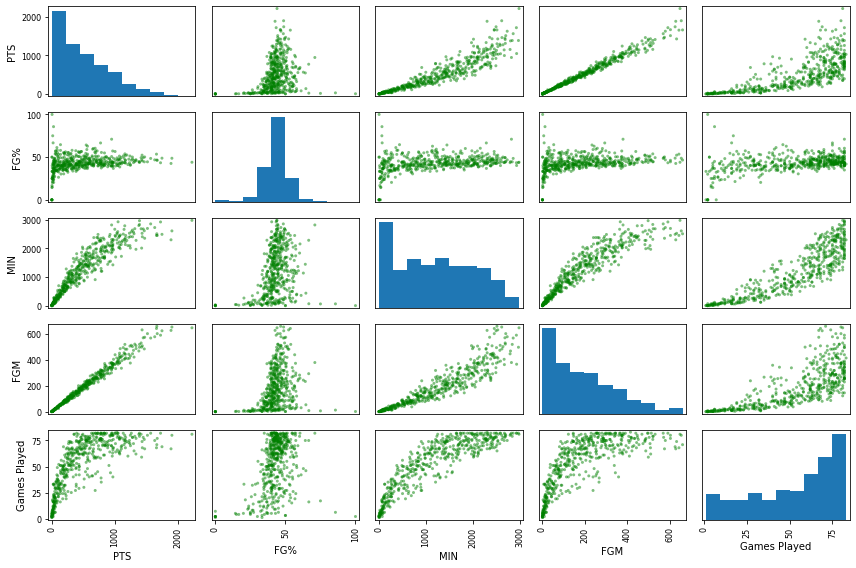

In [104]:
from pandas.plotting import scatter_matrix

just_points = ["PTS"]
attributes = ["PTS", "FG%", "MIN",
                "FGM", "Games Played"]
scatter_matrix(stats[attributes], color='green', figsize=(12, 8))
save_fig("scatter_matrix_plot")

<AxesSubplot:xlabel='OREB', ylabel='FG%'>

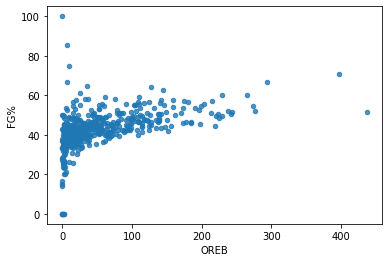

In [79]:
stats.plot(kind="scatter", x="OREB", y="FG%",
          alpha=0.8)
#plt.axis([0,100,0,100])

<AxesSubplot:xlabel='FGM', ylabel='PTS'>

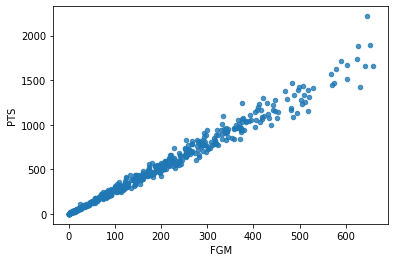

In [112]:
stats.plot(kind="scatter", x="FGM", y="PTS",
             alpha=0.8)
#plt.axis([0, 100, 0, 100])

<AxesSubplot:xlabel='PTS', ylabel='PPG'>

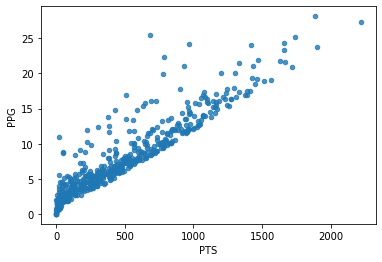

In [77]:
stats.plot(kind="scatter", x="PTS", y="PPG",
             alpha=0.8)
#plt.axis([0, 100, 0, 10])

<AxesSubplot:xlabel='MIN', ylabel='PTS'>

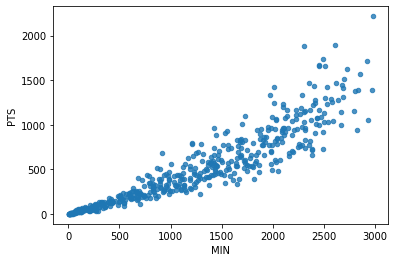

In [111]:
stats.plot(kind="scatter", x="MIN", y="PTS",
             alpha=0.8)


<AxesSubplot:xlabel='PTS', ylabel='TOV'>

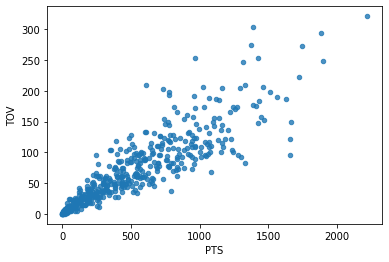

In [80]:
stats.plot(kind="scatter", x="PTS", y="TOV",
             alpha=0.8)

Saving figure per_game_correlation


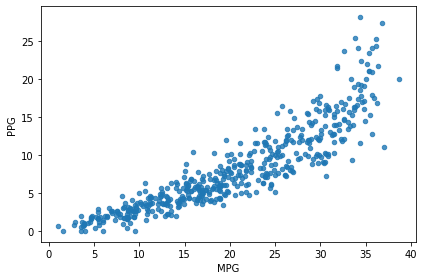

In [51]:
stats.plot(kind="scatter", x="MPG", y="PPG",
          alpha=0.8)
save_fig("per_game_correlation")

In [20]:
stats.set_index('Name')

,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,Experience,Height,Pos,Team,Weight,BMI,PPG,APG,RPG,MPG
Name,,,,,,,,,,,,,,,,,,,,,
AJ Price,26,324,133,51,137,37.2,15,57,26.3,16,...,5,185.0,PG,PHO,81.45,23.798393,5.115385,1.769231,1.230769,12.461538
Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,145,...,6,180.0,PG,CHI,72.45,22.361111,11.634146,3.182927,2.024390,22.987805
Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,44,...,R,202.5,PF,ORL,99.00,24.142661,5.170213,0.702128,3.595745,16.957447
Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,30,...,R,205.0,PF,ATL,106.65,25.377751,6.656250,0.937500,5.062500,23.125000
Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,107,...,7,205.0,C,ATL,110.25,26.234384,15.210526,3.210526,7.157895,30.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xavier Henry,9,86,20,3,13,23.1,0,0,0.0,14,...,4,195.0,SF,LAL,99.00,26.035503,2.222222,0.333333,0.444444,9.555556
Zach LaVine,77,1902,778,286,677,42.2,57,167,34.1,149,...,R,192.5,PG,MIN,85.05,22.951594,10.103896,3.584416,2.779221,24.701299
Zach Randolph,71,2304,1143,454,932,48.7,7,20,35.0,228,...,13,202.5,PF,MEM,117.00,28.532236,16.098592,2.154930,10.521127,32.450704


## Splitting into train and test sets

In [25]:
x =pd.DataFrame(stats.loc[:,["MPG"]])
y=stats.loc[:,["PPG"]]
y=np.array(y).reshape(-1,1)
print(x.shape)
print(y.shape)

(490, 1)
(490, 1)


In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print("shape of training set of X:",x_train.shape)
print("shape of training set of y:",y_train.shape)
print("shape of testing set of x:",x_test.shape)
print("shape of testing set of y:",y_test.shape)

shape of training set of X: (392, 1)
shape of training set of y: (392, 1)
shape of testing set of x: (98, 1)
shape of testing set of y: (98, 1)


## Modeling

I think that I'm going to move forward with points and minutes as my two variables, and try to create a model to predict points given x minutes. So the next step for me is testing different kinds of models to see which works best with the data that I have. With the data I'm using it should be a regression model, rather than a classifier, but I'll have to see which works best

### Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
lrm=LinearRegression()
lrm.fit(x_train,y_train)

LinearRegression()

In [7]:
ly_train_pred=lrm.predict(x_train)
df1=pd.DataFrame({"Actual_train":[y_train],"Predicted_train":[ly_train_pred]})
df2=df1.head()
df2

,Actual_train,Predicted_train
0,"[[7.397435897435898], [15.506666666666666], [2...","[[11.313276979701618], [12.615809386859432], [..."


In [8]:
from pandas.core.common import flatten
y_flat = list(flatten(y_train))
pred_flat = list(flatten(ly_train_pred))
df1=pd.DataFrame({"Actual_train":[y_flat],"Predicted_train":[pred_flat]})
#df2 = df1.head
df2 = np.reshape(df1, (-1, 2))
df2

,Actual_train,Predicted_train
0,"[7.397435897435898, 15.506666666666666, 23.75,...","[11.313276979701618, 12.615809386859432, 14.89..."


In [54]:
# Evaluating linear regression model on the training set
from sklearn.metrics import r2_score
from sklearn import metrics
print("MSE:",metrics.mean_squared_error(y_train,ly_train_pred))
print("MAE:",metrics.mean_absolute_error(y_train,ly_train_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_train,ly_train_pred)))
print("R_squared:",r2_score(y_train,ly_train_pred))

MSE: 6.417099732383073
MAE: 1.8676351811992626
RMSE: 2.533199505049508
R_squared: 0.7910363201332776


## Random Forest Regression

In [25]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x_train, y_train)

C:\Users\bills\AppData\Local\Temp\ipykernel_16112\3158755201.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


RandomForestRegressor()

In [26]:
forest.score(x_train, y_train)

0.9659608472740165

In [27]:
forest.score(x_test, y_test)

0.7511527375102534

In [28]:
rf_train_pred=forest.predict(y_train)
df1=pd.DataFrame({"Actual_train":[y_train],"Predicted_train":[rf_train_pred]})
df2=df1.head()
df2

C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


,Actual_train,Predicted_train
0,"[[7.397435897435898], [15.506666666666666], [2...","[2.2205703965796864, 4.5403089071844835, 8.448..."


In [29]:
print("MSE:",metrics.mean_squared_error(y_train,rf_train_pred))
print("MAE:",metrics.mean_absolute_error(y_train,rf_train_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_train,rf_train_pred)))
print("R_squared:",r2_score(y_train,rf_train_pred))

MSE: 45.2374707706736
MAE: 5.686237222845395
RMSE: 6.72588066878038
R_squared: -0.4730935709787947


## XGBOOST Regression

In [12]:
from xgboost import XGBRegressor

C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [21]:
XGBModel = XGBRegressor()
XGBModel.fit(x_train,y_train, verbose=False)

C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [24]:
xgb_train_pred=XGBModel.predict(x_train)
df1=pd.DataFrame({"Actual_train":[y_train],"Predicted_train":[xgb_train_pred]})
df2=df1.head()
df2

,Actual_train,Predicted_train
0,PPG 325 7.397436 140 15.506667 4...,"[8.186228, 14.648022, 22.718212, 14.377455, 7...."


In [15]:
print("MSE:",metrics.mean_squared_error(y_train,xgb_train_pred))
print("MAE:",metrics.mean_absolute_error(y_train,xgb_train_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_train,xgb_train_pred)))
print("R_squared:",r2_score(y_train,xgb_train_pred))

MSE: 0.3345666639601956
MAE: 0.42929538969489467
RMSE: 0.5784173786809967
R_squared: 0.9891053148341996


## Tuning Hyperparameters

In [27]:
from sklearn.model_selection import GridSearchCV

In [34]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

In [29]:
xgb_reg = XGBRegressor()

In [35]:
grid_search = GridSearchCV(xgb_reg, parameters, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

In [36]:
grid_search.fit(x_train,y_train, verbose=False)

C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:11:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.

[19:11:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:11:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.

[19:11:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:11:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.

[19:11:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:11:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.

[19:11:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:11:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.

[19:11:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:11:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:11:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.

[19:11:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:11:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.

[19:11:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:11:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:11:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.

[19:11:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.

[19:11:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:11:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.

[19:11:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:11:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             param_grid={'colsa

In [37]:
print(grid_search.best_score_)
print(grid_search.best_params_)

-6.9698862958673065
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [38]:
grid_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.03, max_delta_step=0,
             max_depth=5, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=4, nthread=4,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             silent=1, subsample=0.7, tree_method='exact',
             validate_parameters=1, ...)

## eXtreme Gradient Boost on test set

In [41]:
final_model = grid_search.best_estimator_

In [48]:
final_predictions = final_model.predict(x_test)

C:\Users\bills\miniconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [49]:
#evaluating linear regression model on the test set
print("MSE:",metrics.mean_squared_error(y_test,final_predictions))
print("MAE:",metrics.mean_absolute_error(y_test,final_predictions))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,final_predictions)))
print("R_squared:",r2_score(y_test,final_predictions))

MSE: 5.468518670435302
MAE: 1.6240024459406415
RMSE: 2.3384864058692543
R_squared: 0.7973996445013838


The MSE, MAE, and RMSE were all higher on the test set, meaning it performed worse. I likely then overfit the training set. However, I think this is mostly in part to the size of the test set with only 98 players. I think if there was a larger dataset it would've performed closer to one another.